##Strap 전략
Strap 전략은 콜 옵션과 풋 옵션을 모두 매수하는 전략으로, 일반적으로 콜 옵션을 더 많이 매수하여 상승장에서 더 큰 이익을 추구합니다.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-7600bc61e435>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-7600bc61e435>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Call Option Profit/Loss'] = 2 * (np.where(stock_data['Stock Price'] > strike_price_call,
<ipython-input-1-7600bc61e435>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

            Stock Price  Stock Return  Strap Profit  Strap Return
Date                                                             
2023-01-03   125.070000      0.000000     10.930000      0.000000
2023-01-04   126.360001      0.010314      9.639999      0.077077
2023-01-05   125.019997     -0.010605     10.980003      0.086895
2023-01-06   129.619995      0.036794      6.380005      0.051032
2023-01-09   130.149994      0.004089      5.850006      0.045132
...                 ...           ...           ...           ...
2023-12-22   193.600006     -0.005547     73.200012      0.376002
2023-12-26   193.050003     -0.002841     72.100006      0.372417
2023-12-27   193.149994      0.000518     72.299988      0.374514
2023-12-28   193.580002      0.002226     73.160004      0.378773
2023-12-29   192.529999     -0.005424     71.059998      0.367083

[250 rows x 4 columns]


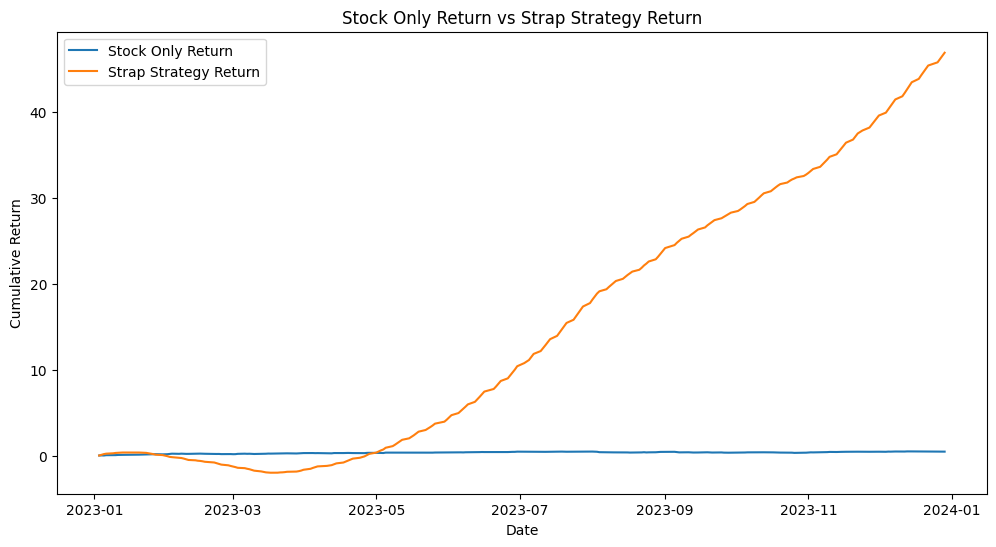

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Strap 설정
strike_price_call = 150
strike_price_put = 150
premium_paid_call = 5   # 콜 옵션 매수 시 지불한 프리미엄 (예시, 2배 매수)
premium_paid_put = 4    # 풋 옵션 매수 시 지불한 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Strap 수익 계산 함수
def calculate_strap(stock_data, strike_price_call, strike_price_put, premium_paid_call, premium_paid_put):
    # 콜 옵션 손익 계산 (콜 옵션 2배 매수)
    stock_data['Call Option Profit/Loss'] = 2 * (np.where(stock_data['Stock Price'] > strike_price_call,
                                                          stock_data['Stock Price'] - strike_price_call,
                                                          0) - premium_paid_call)
    # 풋 옵션 손익 계산
    stock_data['Put Option Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price_put,
                                                    strike_price_put - stock_data['Stock Price'],
                                                    0) - premium_paid_put

    # Strap 전략의 총 수익 계산
    stock_data['Strap Profit'] = stock_data['Call Option Profit/Loss'] + stock_data['Put Option Profit/Loss']

    # 총 수익률 계산
    stock_data['Strap Return'] = stock_data['Strap Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Strap Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
strap_results = calculate_strap(data, strike_price_call, strike_price_put, premium_paid_call, premium_paid_put)

# 결과 출력
print(strap_results[['Stock Price', 'Stock Return', 'Strap Profit', 'Strap Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(strap_results.index, strap_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(strap_results.index, strap_results['Strap Return'].cumsum(), label='Strap Strategy Return')
plt.title('Stock Only Return vs Strap Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
